02-02-26

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import json

In [ ]:
from pandas import json_normalize

In [ ]:
#flat json
data= {
    'Name':'Prasanthi',
    'Rollno':9,
    'Occupation':'Nothing'
}

In [ ]:
with open('flat.json','w') as f:
  json.dump(data,f,indent=4)

In [ ]:
df=pd.read_json('flat.json',typ='series')

In [ ]:
df

,0
Name,Prasanthi
Rollno,9
Occupation,Nothing


In [ ]:
data=[{
    'Name':'Prasanthi',
    'Rollno':9,
    'Occupation':'Nothing'
},
{
    'Name':'P',
    'Rollno':10,
    'Occupation':'Nothing'
},
{
    'Name':'Pra',
    'Rollno':11,
    'Occupation':'Nothing'
}]

In [ ]:
with open('nested.json','w') as f:
  json.dump(data,f,indent=4)

In [ ]:
df1=pd.read_json('nested.json')

In [ ]:
df1

,Name,Rollno,Occupation
0,Prasanthi,9,Nothing
1,P,10,Nothing
2,Pra,11,Nothing


In [ ]:
df1.to_csv('nested.csv',index=False)

In [ ]:
df=pd.read_csv('nested.csv')
df

,Name,Rollno,Occupation
0,Prasanthi,9,Nothing
1,P,10,Nothing
2,Pra,11,Nothing


In [ ]:
#nested json
data = {
    "order_id": 101,
    "customer": {
        "customer_id": "C001",
        "name": "Rahul",
        "contact": {
            "email": "rahul@gmail.com",
            "phone": "9876543210"
        }
    },
    "items": [
        {
            "product_id": "P001",
            "product_name": "Laptop",
            "price": 60000,
            "quantity": 1
        },
        {
            "product_id": "P002",
            "product_name": "Mouse",
            "price": 800,
            "quantity": 2
        }
    ],
    "payment": {
        "method": "Credit Card",
        "status": "Success"
    }
}

In [ ]:
with open('nested.json','w') as f:
    json.dump(data,f,indent=4)

In [ ]:
df=json_normalize(data)
df

,order_id,items,customer.customer_id,customer.name,customer.contact.email,customer.contact.phone,payment.method,payment.status
0,101,"[{'product_id': 'P001', 'product_name': 'Lapto...",C001,Rahul,rahul@gmail.com,9876543210,Credit Card,Success


In [ ]:
df=json_normalize(data,record_path='items')
df

,product_id,product_name,price,quantity
0,P001,Laptop,60000,1
1,P002,Mouse,800,2


In [ ]:
df=json_normalize(data,record_path='items',meta=['order_id',
                                                ['customer','name'],
                                                 ['customer','contact','email'],
                                                 ['customer','contact','phone'],
                                                 ['payment','method'],
                                                 ['payment','status']])
df


,product_id,product_name,price,quantity,order_id,customer.name,customer.contact.email,customer.contact.phone,payment.method,payment.status
0,P001,Laptop,60000,1,101,Rahul,rahul@gmail.com,9876543210,Credit Card,Success
1,P002,Mouse,800,2,101,Rahul,rahul@gmail.com,9876543210,Credit Card,Success


In [ ]:
df.to_csv('nested.csv',index=False)

In [ ]:
df=pd.read_csv('nested.csv')
df

,product_id,product_name,price,quantity,order_id,customer.name,customer.contact.email,customer.contact.phone,payment.method,payment.status
0,P001,Laptop,60000,1,101,Rahul,rahul@gmail.com,9876543210,Credit Card,Success
1,P002,Mouse,800,2,101,Rahul,rahul@gmail.com,9876543210,Credit Card,Success


In [ ]:
df.rename({'customer.name':'name','customer.contact.email':'email','customer.contact.phone':'phone','payment.method':'payment method','payment.status':'status'},axis=1,inplace=True)
df

,product_id,product_name,price,quantity,order_id,name,email,phone,payment method,status
0,P001,Laptop,60000,1,101,Rahul,rahul@gmail.com,9876543210,Credit Card,Success
1,P002,Mouse,800,2,101,Rahul,rahul@gmail.com,9876543210,Credit Card,Success


03-02-26

In [ ]:
import pandas as pd,numpy as np,json
from pandas import json_normalize

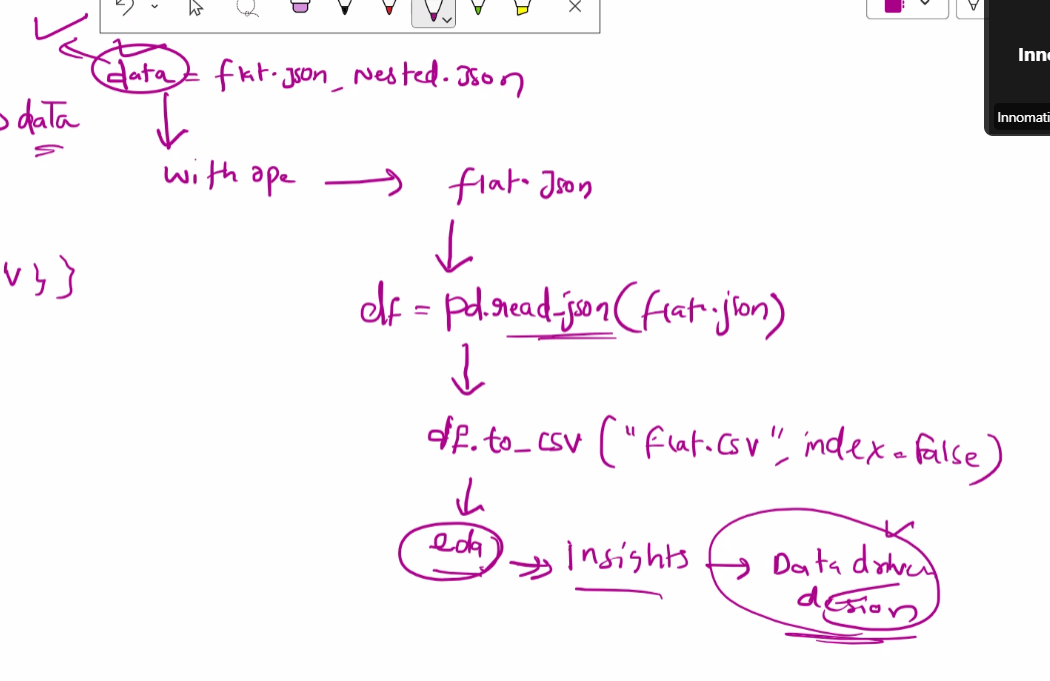

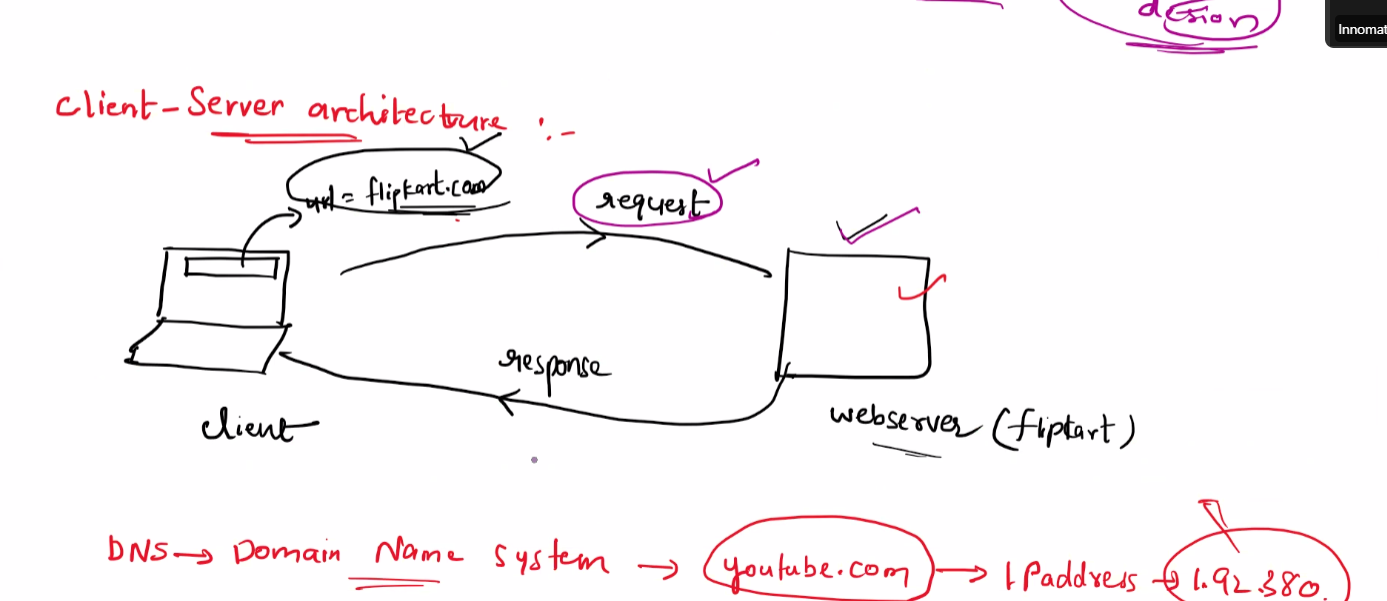

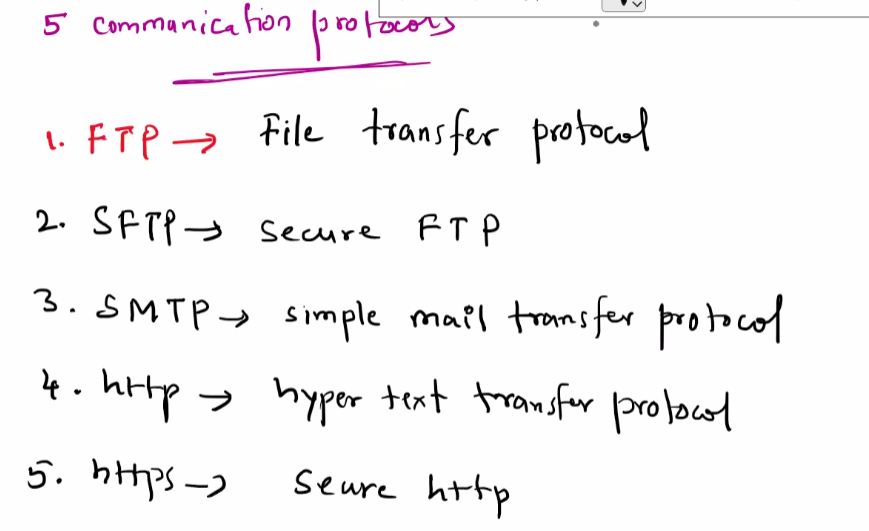

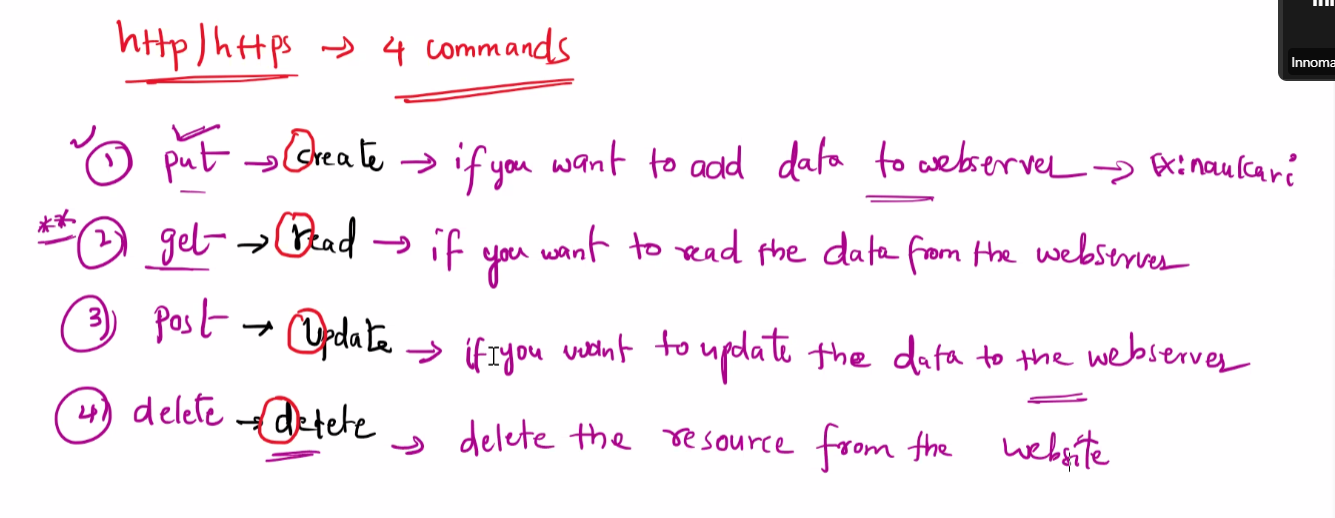

type of responses:

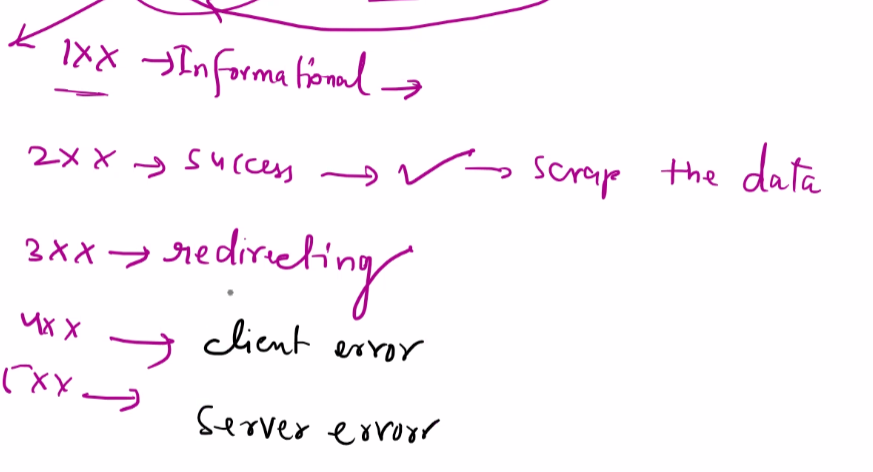

web api:

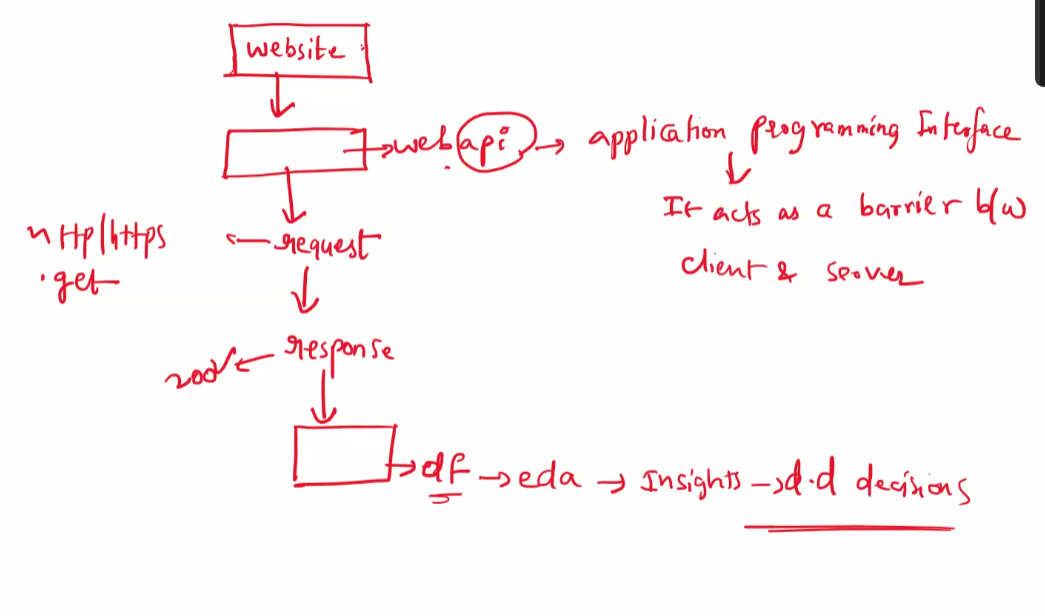

In [ ]:
import requests

In [ ]:
url="https://www.google.com/search?q=flipkart&oq=flip&gs_lcrp=EgZjaHJvbWUqDQgAEAAY4wIYsQMYgAQyDQgAEAAY4wIYsQMYgAQyEAgBEC4YxwEYsQMY0QMYgAQyDAgCEEUYORixAxiABDIKCAMQABixAxiABDINCAQQABiDARixAxiABDIKCAUQABixAxiABDINCAYQLhivARjHARiABDIGCAcQBRhA0gEIMjQwN2owajeoAgiwAgHxBSyWC88scVLo8QUslgvPLHFS6A&sourceid=chrome&ie=UTF-8"


In [ ]:
response=requests.get(url)

In [ ]:
response

<Response [200]>

In [ ]:
response.headers

{'Content-Type': 'text/html; charset=ISO-8859-1', 'Content-Security-Policy': "object-src 'none';base-uri 'self';script-src 'nonce-hQ673izus0w-eE-mJKA6BA' 'strict-dynamic' 'report-sample' 'unsafe-eval' 'unsafe-inline' https: http:;report-uri https://csp.withgoogle.com/csp/gws/xsrp", 'Reporting-Endpoints': 'default="//www.google.com/httpservice/retry/jserror?ei=9XqBabr9IdqTwbkPtd-4oAo&cad=crash"', 'Accept-CH': 'Sec-CH-Prefers-Color-Scheme', 'P3P': 'CP="This is not a P3P policy! See g.co/p3phelp for more info."', 'Content-Encoding': 'gzip', 'Date': 'Tue, 03 Feb 2026 04:35:01 GMT', 'Server': 'gws', 'X-XSS-Protection': '0', 'X-Frame-Options': 'SAMEORIGIN', 'Expires': 'Tue, 03 Feb 2026 04:35:01 GMT', 'Cache-Control': 'private', 'Set-Cookie': '__Secure-STRP=AD6DogstIGh5S8TOghXwrGKeZj7tzEB5Faqwhuz1UPy3Jguuyq27E_lHW9qiN2gpRz9zueImhrkENACoJF_eLt7EBVc1pYG2cGFl; expires=Tue, 03-Feb-2026 04:40:01 GMT; path=/; domain=.google.com; Secure; SameSite=strict, AEC=AaJma5uTF-P5oc-yUpgXIJqzTHlKTvZzizFcSGeZ2

In [ ]:
response.headers['Content-Type']

'text/html; charset=ISO-8859-1'

In [ ]:
response.status_code

200

In [ ]:
response.encoding

'ISO-8859-1'

In [ ]:
response.text[1:100]

'!DOCTYPE html><html lang="en"><head><title>Google Search</title><style>body{background-color:#fff}<'

In [ ]:
response.content[1:100]

b'!DOCTYPE html><html lang="en"><head><title>Google Search</title><style>body{background-color:#fff}<'

In [ ]:
url='https://sis.kalasalingam.ac.in/login'

In [ ]:
r=requests.get(url)

In [ ]:
r

<Response [200]>

In [ ]:
r.headers

{'Server': 'nginx/1.18.0 (Ubuntu)', 'Content-Type': 'text/html; charset=UTF-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Cache-Control': 'no-cache, private', 'Date': 'Tue, 03 Feb 2026 04:41:35 GMT', 'Set-Cookie': 'XSRF-TOKEN=eyJpdiI6IkRPU3dmcEpNbWxPWVVsVHQ0TmxheGc9PSIsInZhbHVlIjoiNmtQUFU4WjZiNWlPTWJFQWRHcG1GTm92MHB4dTduRHBRYUs0YW8xamlLRjFIbERoVjBqNlZwQlJYRzlZQTdhYnlTUDQwYjYyakl5QVNvZFlIUVdXdzVaMFZhSGNQQmc5d3d1YlNpK0dlTHZTK3YwTjRIeEZiUjArL3NRY2trMFIiLCJtYWMiOiI0YjFhNzMwMGFkODNmN2MzODJmNzdmN2FlYTA0NjNjZjg5NTEyNTQ0MjE2MjQ0NzZiOWJjNzc4ZDg4NTM3ODU2IiwidGFnIjoiIn0%3D; expires=Tue, 03 Feb 2026 06:41:35 GMT; Max-Age=7200; path=/, sis_session=eyJpdiI6InZSRm0wVjBnR3U0K0JNNE5zRjBLelE9PSIsInZhbHVlIjoiZHlSOVhURllTdXhBSzN6NzNxM2hkOExaZWNSL29ETkl0aXc2SkQzWWI1Lzc0c2gzQnFqanRRVVd6akRXbjdXcEFwblZWZWp1c1paL1JKSXhVOVlBdDUxclYxcG42eHlHNVFMSkhUeFIzNWgydC9QT1ZMY0M4NHlwZ2tiSjBobHQiLCJtYWMiOiJjNGVmYzc1NTIxZmE4YzNlZjAyZTA1YzcxYjJkNDA0NTdlOWZjYzA0OGQzMWE0N2JkOTU4NzlmNzhmMTQ1NTlmIiwidGFnIjoiIn

In [ ]:
r.headers['Content-Type']

'text/html; charset=UTF-8'

In [ ]:
r.status_code

200

In [ ]:
r.encoding

'UTF-8'

In [ ]:
r.text

'<!DOCTYPE html>\n<html>\n<head>\n  <meta http-equiv="X-UA-Compatible" content="IE=edge">\n  <meta content="width=device-width, initial-scale=1" name="viewport" />\n  <meta content="Student Information System" name="description" />\n  <meta content="Selvakumar Sankaravel" name="author" />\n\n    <title>Student Information System - KARE-SIS</title>\n  \n\n  <!-- Styles -->\n  <link rel="stylesheet" href="https://sis.kalasalingam.ac.in/css/login.css">\n\n  <style>\n\n.touch .login-content{\n  margin-top:auto !important;\n\n}\n\n\n  </style>\n\n\n\n  <link rel="shortcut icon" href="favicon.png" />\n  <script>window.login_slides =["https://sis.kalasalingam.ac.in/images/bg4.jpg","https://sis.kalasalingam.ac.in/images/bg2.jpg","https://sis.kalasalingam.ac.in/images/bg3.jpg"];</script>\n</head>\n<body class="login  ">\n\n  \n <div class="user-login-5">\n    <div class="row bs-reset">\n      <div class="col-md-6 bs-reset">\n        <div class="login-bg" style="">\n          <img class="login-l

In [ ]:
url='https://google.com/search/abcd'
r=requests.get(url)
r

<Response [404]>

In [ ]:
#query parameter
url='https://google.com/search'
parameters={'q':'Prasanthi koppuravuri'}
r=requests.get(url,params=parameters)
r

<Response [200]>

In [ ]:
r.headers['Content-Type']

'text/html; charset=ISO-8859-1'

In [ ]:
url='http://api.open-notify.org/iss-now.json'
r=requests.get(url)
r

<Response [200]>

In [ ]:
r.headers

{'Server': 'nginx/1.10.3', 'Date': 'Tue, 03 Feb 2026 05:00:00 GMT', 'Content-Type': 'application/json', 'Content-Length': '114', 'Connection': 'keep-alive', 'access-control-allow-origin': '*'}

In [ ]:
r.status_code

200

In [ ]:
data=r.json()

In [ ]:
with open('location.json','w') as f:
  json.dump(data,f,indent=4)

In [ ]:
df=pd.read_json('location.json')

In [ ]:
df.to_csv('location.csv',index=False)

In [ ]:
df=pd.read_csv('location.csv')

In [ ]:
df

,timestamp,message,iss_position
0,2026-02-03 05:00:00,success,11.0137
1,2026-02-03 05:00:00,success,-154.4548


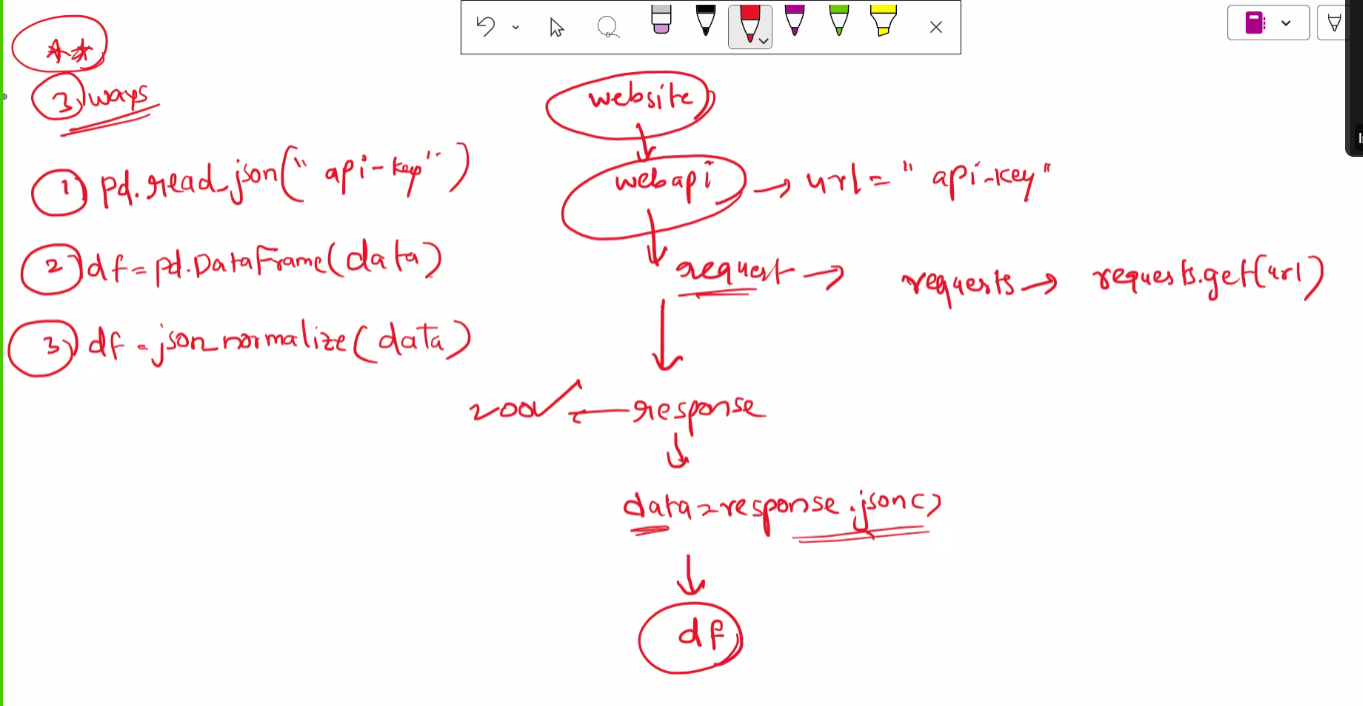

In [ ]:
url='http://api.open-notify.org/astros.json'
r=requests.get(url)
r

<Response [200]>

In [ ]:
r.headers

{'Server': 'nginx/1.10.3', 'Date': 'Tue, 03 Feb 2026 05:10:55 GMT', 'Content-Type': 'application/json', 'Content-Length': '587', 'Connection': 'keep-alive', 'access-control-allow-origin': '*'}

In [ ]:
r.headers['Content-Type']

'application/json'

In [ ]:
d=r.json()
d

{'people': [{'craft': 'ISS', 'name': 'Oleg Kononenko'},
  {'craft': 'ISS', 'name': 'Nikolai Chub'},
  {'craft': 'ISS', 'name': 'Tracy Caldwell Dyson'},
  {'craft': 'ISS', 'name': 'Matthew Dominick'},
  {'craft': 'ISS', 'name': 'Michael Barratt'},
  {'craft': 'ISS', 'name': 'Jeanette Epps'},
  {'craft': 'ISS', 'name': 'Alexander Grebenkin'},
  {'craft': 'ISS', 'name': 'Butch Wilmore'},
  {'craft': 'ISS', 'name': 'Sunita Williams'},
  {'craft': 'Tiangong', 'name': 'Li Guangsu'},
  {'craft': 'Tiangong', 'name': 'Li Cong'},
  {'craft': 'Tiangong', 'name': 'Ye Guangfu'}],
 'number': 12,
 'message': 'success'}

In [ ]:
#1
df=pd.read_json('http://api.open-notify.org/astros.json')
df

,people,number,message
0,"{'craft': 'ISS', 'name': 'Oleg Kononenko'}",12,success
1,"{'craft': 'ISS', 'name': 'Nikolai Chub'}",12,success
2,"{'craft': 'ISS', 'name': 'Tracy Caldwell Dyson'}",12,success
3,"{'craft': 'ISS', 'name': 'Matthew Dominick'}",12,success
4,"{'craft': 'ISS', 'name': 'Michael Barratt'}",12,success
5,"{'craft': 'ISS', 'name': 'Jeanette Epps'}",12,success
6,"{'craft': 'ISS', 'name': 'Alexander Grebenkin'}",12,success
7,"{'craft': 'ISS', 'name': 'Butch Wilmore'}",12,success
8,"{'craft': 'ISS', 'name': 'Sunita Williams'}",12,success
9,"{'craft': 'Tiangong', 'name': 'Li Guangsu'}",12,success


In [ ]:
#2 pd.DataFrame(data)
pd.DataFrame(d)

,people,number,message
0,"{'craft': 'ISS', 'name': 'Oleg Kononenko'}",12,success
1,"{'craft': 'ISS', 'name': 'Nikolai Chub'}",12,success
2,"{'craft': 'ISS', 'name': 'Tracy Caldwell Dyson'}",12,success
3,"{'craft': 'ISS', 'name': 'Matthew Dominick'}",12,success
4,"{'craft': 'ISS', 'name': 'Michael Barratt'}",12,success
5,"{'craft': 'ISS', 'name': 'Jeanette Epps'}",12,success
6,"{'craft': 'ISS', 'name': 'Alexander Grebenkin'}",12,success
7,"{'craft': 'ISS', 'name': 'Butch Wilmore'}",12,success
8,"{'craft': 'ISS', 'name': 'Sunita Williams'}",12,success
9,"{'craft': 'Tiangong', 'name': 'Li Guangsu'}",12,success


In [ ]:
#3 json_normalize(data)
df=json_normalize(d,record_path='people',meta=['number','message'])
df

,craft,name,number,message
0,ISS,Oleg Kononenko,12,success
1,ISS,Nikolai Chub,12,success
2,ISS,Tracy Caldwell Dyson,12,success
3,ISS,Matthew Dominick,12,success
4,ISS,Michael Barratt,12,success
5,ISS,Jeanette Epps,12,success
6,ISS,Alexander Grebenkin,12,success
7,ISS,Butch Wilmore,12,success
8,ISS,Sunita Williams,12,success
9,Tiangong,Li Guangsu,12,success


**Extracting Crypto Data using Coingecko API**

**ROOT_URL = "https://api.coingecko.com/api/v3"**

**API End Points**
> **Ping** - `/ping`  
> **Coin List** - `/coins/list`

In [ ]:
url='https://api.coingecko.com/api/v3'
r=requests.get(url)
r

<Response [404]>

In [ ]:
url='https://api.coingecko.com/api/v3/ping'
r=requests.get(url)
r

<Response [200]>

In [ ]:
d=r.json()
d

{'gecko_says': '(V3) To the Moon!'}

In [ ]:
json_normalize(d)

,gecko_says
0,(V3) To the Moon!


In [ ]:
url='https://api.coingecko.com/api/v3/coins/list'
r=requests.get(url)
r

<Response [200]>

In [ ]:
d=r.json()
d

[{'id': '_', 'symbol': 'gib', 'name': '༼ つ ◕_◕ ༽つ'},
 {'id': '000-capital', 'symbol': '000', 'name': '000 Capital'},
 {'id': '01111010011110000110001001110100-token',
  'symbol': '01111010011110000110001001110100',
  'name': '01111010011110000110001001110100'},
 {'id': '01-token', 'symbol': '01', 'name': '01'},
 {'id': '0chain', 'symbol': 'zcn', 'name': 'Zus'},
 {'id': '0vix-protocol', 'symbol': 'vix', 'name': '0VIX Protocol'},
 {'id': '0x', 'symbol': 'zrx', 'name': '0x Protocol'},
 {'id': '0x0-ai-ai-smart-contract',
  'symbol': '0x0',
  'name': '0x0.ai: AI Smart Contract'},
 {'id': '0xgasless-2', 'symbol': '0xgas', 'name': '0xGasless'},
 {'id': '0xgen', 'symbol': 'xgn', 'name': '0xGen'},
 {'id': '0x-leverage', 'symbol': 'oxl', 'name': '0x Leverage'},
 {'id': '0xlsd', 'symbol': '0xlsd', 'name': '0xLSD'},
 {'id': '0xmonk', 'symbol': 'monk', 'name': '0xMonk by Virtuals'},
 {'id': '0x-protocol-avalanche-bridged-zrx-e',
  'symbol': 'zrx.e',
  'name': 'Avalanche Bridged ZRX (Avalanche)'},
 

In [ ]:
df=json_normalize(d)
df

,id,symbol,name
0,_,gib,༼ つ ◕_◕ ༽つ
1,000-capital,000,000 Capital
2,01111010011110000110001001110100-token,01111010011110000110001001110100,01111010011110000110001001110100
3,01-token,01,01
4,0chain,zcn,Zus
...,...,...,...
18942,zygo-the-frog-2,zygo,Zygo The Frog
18943,zyncoin-2,zyn,ZynCoin
18944,zynexa,zynx,Zynexa
18945,zyro-2,zyro,ZYRO
